In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import t, ttest_ind, levene

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

In [ ]:
all_data = pd.read_csv("rmpCapstoneAdjusted_69989.csv")
# display(all_data.columns, len(all_data))

In [ ]:
all_data.head()

,Average Rating,Average Rating (Adjusted),Average Difficulty,Average Difficulty (Adjusted),Number of ratings,Received a “pepper”?,The proportion of students that said they would take the class again,The number of ratings coming from online classes,Male gender,Female,Major/Field,University,US State,Tough grader,Good feedback,Respected,Lots to read,Participation matters,Don’t skip class or you will not pass,Lots of homework,Inspirational,Pop quizzes!,Accessible,So many papers,Clear grading,Hilarious,Test heavy,Graded by few things,Amazing lectures,Caring,Extra credit,Group projects,Lecture heavy,Tough grader (Normalized),Good feedback (Normalized),Respected (Normalized),Lots to read (Normalized),Participation matters (Normalized),Don’t skip class or you will not pass (Normalized),Lots of homework (Normalized),Inspirational (Normalized),Pop quizzes! (Normalized),Accessible (Normalized),So many papers (Normalized),Clear grading (Normalized),Hilarious (Normalized),Test heavy (Normalized),Graded by few things (Normalized),Amazing lectures (Normalized),Caring (Normalized),Extra credit (Normalized),Group projects (Normalized),Lecture heavy (Normalized),Total Number of Tags,Average Tags per Rating
0,5.0,4.284895,1.5,2.318731,2.0,0.0,NaN,0.0,0,1,Criminal Justice,George Mason University,VA,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.500000,2,1.000000
1,3.2,3.460639,3.0,2.941951,4.0,0.0,NaN,0.0,1,0,English,Alabama State University,AL,2,1,2,1,0,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0.500000,0.250000,0.500000,0.250000,0.000000,1.000000,0.500000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,12,3.000000
2,3.6,3.648037,3.5,3.353358,10.0,1.0,NaN,0.0,0,0,English,University of Kentucky,KY,6,3,0,0,2,4,2,1,0,0,0,2,1,0,0,0,0,0,1,0,0.600000,0.300000,0.000000,0.000000,0.200000,0.400000,0.200000,0.100000,0.0,0.000000,0.0,0.200000,0.100000,0.0,0.0,0.0,0.000000,0.0,0.100000,0.000000,22,2.200000
3,1.0,3.106119,5.0,3.398414,1.0,0.0,NaN,0.0,0,0,English,Keiser University,FL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0,0.000000
4,3.5,3.536979,3.3,3.247746,22.0,0.0,56.0,7.0,1,0,English,Eastern Florida State College,FL,8,13,1,3,2,3,2,1,0,3,0,7,3,0,0,0,3,0,1,3,0.363636,0.590909,0.045455,0.136364,0.090909,0.136364,0.090909,0.045455,0.0,0.136364,0.0,0.318182,0.136364,0.0,0.0,0.0,0.136364,0.0,0.045455,0.136364,53,2.409091


## Question 1

### For Question 1, we firstly apply Levene's test to check whether the two datasets have equal variances, and then use the proper t-test to test whether the ratings are gendered.

In [ ]:
rng = np.random.default_rng(14420733)

ALPHA = 0.005
# extract average difficulty for male and female professors
rating_male = all_data.query("`Male gender` == 1")["Average Rating (Adjusted)"]
rating_female = all_data.query("`Female` == 1")["Average Rating (Adjusted)"]

# We must reindex here. It is crucial for bootstrapping in Question 3
rating_male = rating_male.reset_index(drop=True)
rating_female = rating_female.reset_index(drop=True)

# calculate and print sample sizes
n_male, n_female = len(rating_male), len(rating_female)
print(f"Number of male professors: {n_male}")
print(f"Number of female professors: {n_female}")

# calculate and print variances
var_male, var_female  = rating_male.var(ddof=1), rating_female.var(ddof=1)
print(f"Variance in Average Difficulty (Adjusted) of male professors: {var_male:.4f}")
print(f"Variance in Average Difficulty (Adjusted) of female professors: {var_female:.4f}")

# perform Levene's test to check for equal variances, and then decide the proper test.
levene_test = levene(rating_male, rating_female)
print(f"Levene's Test:\n  Statistic = {levene_test.statistic:.4f}\n  P-Value = {levene_test.pvalue:.4e}")
if levene_test.pvalue > ALPHA:
    print("We can assume equal vairance --> We shall use independent samples t-test\n")
    inde_t_test = ttest_ind(rating_male, rating_female, equal_var=True)
    stats, pval = inde_t_test.statistic, inde_t_test.pvalue
    print(f"Independent Samples t-test:\n  Statistic = {stats:.4f}\n  P-Value = {pval:.4e}")
else:
    print("We cannot assume equal vairance --> We shall use Welch t-test\n")
    welch_t_test = ttest_ind(rating_male, rating_female, equal_var=False)
    stats, pval = welch_t_test.statistic, welch_t_test.pvalue
    print(f"Welch t-Test:\n  Statistic = {welch_t_test.statistic:.4f}\n  P-Value = {welch_t_test.pvalue:.4e}")

whether_significant = 'significant!' if pval < ALPHA else 'not significant!'
print(f"The p-value for the t-test is {pval:.4e}, which means that the result is {whether_significant}")



Number of male professors: 29371
Number of female professors: 27130
Variance in Average Difficulty (Adjusted) of male professors: 0.2923
Variance in Average Difficulty (Adjusted) of female professors: 0.3059
Levene's Test:
  Statistic = 21.6278
  P-Value = 3.3177e-06
We cannot assume equal vairance --> We shall use Welch t-test

Welch t-Test:
  Statistic = 6.9173
  P-Value = 4.6518e-12
The p-value for the t-test is 4.6518e-12, which means that the result is significant!


3.8520267170512805 3.8201569879188426


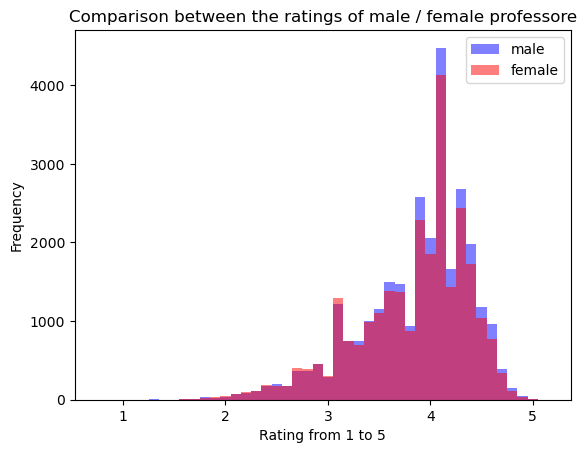

In [ ]:
print(rating_male.mean(), rating_female.mean())
bins = np.arange(0.75, 5.25, 0.1)
plt.hist(rating_male, bins=bins, label='male', alpha=0.5, color="blue")
plt.hist(rating_female, bins=bins, label='female', alpha=0.5, color="red")
plt.xlabel('Rating from 1 to 5')
plt.ylabel('Frequency')
plt.title('Comparison between the ratings of male / female professore')
plt.legend()
plt.show()

## Question 2

### For Quesion 2, we use Levene's test to check whether there is a gender difference in spread

In [ ]:
# calculate and print variances
var_male, var_female  = rating_male.var(ddof=1), rating_female.var(ddof=1)
print(f"Variance in Average Difficulty (Adjusted) of male professors: {var_male:.4f}")
print(f"Variance in Average Difficulty (Adjusted) of female professors: {var_female:.4f}")

# perform Levene's test to check for equal variances, and then decide the proper test.
levene_test = levene(rating_male, rating_female)
print(f"Levene's Test:\n  Statistic = {levene_test.statistic:.4f}\n  P-Value = {levene_test.pvalue:.4e}")
if levene_test.pvalue > ALPHA:
    print("There is not a gender difference in the spread \n")
else:
    print("There is a gender difference in the spread \n")

Variance in Average Difficulty (Adjusted) of male professors: 0.2923
Variance in Average Difficulty (Adjusted) of female professors: 0.3059
Levene's Test:
  Statistic = 21.6278
  P-Value = 3.3177e-06
There is a gender difference in the spread 



## Question 3

### For Question 3, we use boostrap to determine the confidence interval of the effect size of mean and variance

In [ ]:
rng = np.random.default_rng(14420733)
num_samples = 10000
n_exper = 5000
boot_male_mean, boot_female_mean, boot_male_var, boot_female_var = [], [], [], []
boot_cohen_d, boot_var_ratio = [], []

for i in range(n_exper):
    # Generate my bootstrap samples
    boot_male_ind = rng.integers(low=0, high=len(rating_male), size=num_samples)
    boot_female_ind = rng.integers(low=0, high=len(rating_female), size=num_samples)

    boot_male_samp, boot_female_samp = rating_male[boot_male_ind], rating_female[boot_female_ind]

    # Calculate and append bootstrapped means and variances
    each_mean_male, each_mean_female = boot_male_samp.mean(), boot_female_samp.mean()
    each_var_male, each_var_female = boot_male_samp.var(ddof=1), boot_female_samp.var(ddof=1)

    boot_male_mean.append(each_mean_male)
    boot_male_var.append(each_var_male)
    boot_female_mean.append(each_mean_female)
    boot_female_var.append(each_var_female)

    # Calculate Cohen's d and variance ratio
    # I am doing this inside the loop because the values are stored in lists rather than ndarray
    each_mean_diff = each_mean_male - each_mean_female
    boot_cohen_d.append(each_mean_diff / np.sqrt((each_var_male + each_var_female) / 2) )
    boot_var_ratio.append(each_var_male / each_var_female)

# Calculate 95% confidence intervals for Cohen's d and variance ratio
ci_cohen_d = np.percentile(boot_cohen_d, [2.5, 97.5])
ci_var_ratio = np.percentile(boot_var_ratio, [2.5, 97.5])

# Output results

print(f"Bootstrapped Cohen's d: {np.mean(boot_cohen_d):.4f}")
print(f"95% CI for Cohen's d: {ci_cohen_d}")
print(f"Bootstrapped Variance Ratio: {np.mean(ci_var_ratio):.4f}")
print(f"95% CI for Variance Ratio: {ci_var_ratio}")


Bootstrapped Cohen's d: 0.0582
95% CI for Cohen's d: [0.03010664 0.08580679]
Bootstrapped Variance Ratio: 0.9565
95% CI for Variance Ratio: [0.91368686 0.99934664]


## Question 4

### For Question 4, we use t test to determine whether each tag is gendered.

In [ ]:
# First extrace columns that are tages
normalized_tag_columns = [
    'Tough grader (Normalized)', 'Good feedback (Normalized)', 'Respected (Normalized)',
    'Lots to read (Normalized)', 'Participation matters (Normalized)', 
    "Don’t skip class or you will not pass (Normalized)", 'Lots of homework (Normalized)',
    'Inspirational (Normalized)', 'Pop quizzes! (Normalized)', 'Accessible (Normalized)', 
    'So many papers (Normalized)', 'Clear grading (Normalized)', 'Hilarious (Normalized)',
    'Test heavy (Normalized)', 'Graded by few things (Normalized)', 'Amazing lectures (Normalized)',
    'Caring (Normalized)', 'Extra credit (Normalized)', 'Group projects (Normalized)',
    'Lecture heavy (Normalized)'
]

# This result list will be used to generate a dataframe to match tag and p-values
tag_results = []

for tag in normalized_tag_columns:
    # Split normalized tag values by gender
    tag_male = all_data.query("`Male gender` == 1")[tag]
    tag_female = all_data.query("`Female` == 1")[tag]
    
    # Perform Levene first, and then t-test
    levene_test = levene(tag_male, tag_female)
    if_eq_var = False if levene_test.pvalue > ALPHA else True
    each_result = ttest_ind(tag_male, tag_female, equal_var=if_eq_var)
    
    tag_results.append({'Tag': tag, 'P-Value': each_result.pvalue})

# Convert results to DataFrame, such that tags are paired with p-values, then sort
results_df = pd.DataFrame(tag_results)
results_df = results_df.sort_values('P-Value')

# extract significantly gendered tags
gendered_tags = results_df[results_df["P-Value"] <= ALPHA]["Tag"].to_list()
gendered_tags = [each_tag.replace(" (Normalized)", "") for each_tag in gendered_tags]
print(f"The following {len(gendered_tags)} tags exhibit a statistically significant different in gender: {gendered_tags}")

most_sig_3, least_sig_3 = results_df["Tag"].to_list()[:3], results_df["Tag"].to_list()[-3:]
most_sig_3 = [each_tag.replace(" (Normalized)", "") for each_tag in most_sig_3]
least_sig_3 = [each_tag.replace(" (Normalized)", "") for each_tag in least_sig_3]
print(f"The most gendered 3 tags are {most_sig_3}, and the least gendered 3 tags are {least_sig_3}")

The following 19 tags exhibit a statistically significant different in gender: ['Hilarious', 'Amazing lectures', 'Caring', 'Respected', 'Lecture heavy', 'Participation matters', 'Good feedback', 'Graded by few things', 'Lots of homework', 'Group projects', 'So many papers', 'Extra credit', 'Tough grader', 'Test heavy', 'Clear grading', 'Accessible', 'Inspirational', 'Lots to read', 'Don’t skip class or you will not pass']
The most gendered 3 tags are ['Hilarious', 'Amazing lectures', 'Caring'], and the least gendered 3 tags are ['Lots to read', 'Don’t skip class or you will not pass', 'Pop quizzes!']


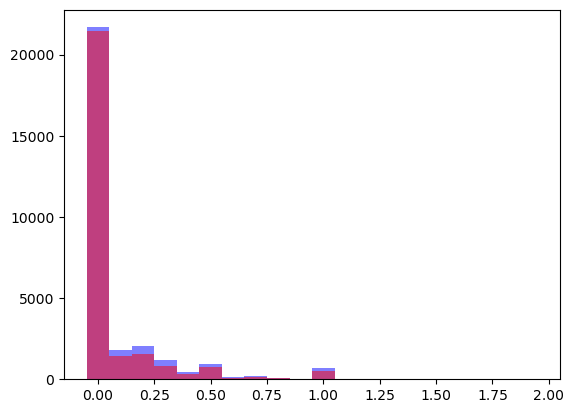

In [ ]:
tag1 = 'Tough grader (Normalized)'
tag_male = all_data.query("`Male gender` == 1")[tag]
tag_female = all_data.query("`Female` == 1")[tag]
bins = np.arange(-0.05, np.maximum(tag_male.max(), tag_female.max()), 0.1)
plt.hist(tag_male, bins=bins, alpha=0.5, color="blue")
plt.hist(tag_female, bins=bins, alpha=0.5, color="red")
plt.show()

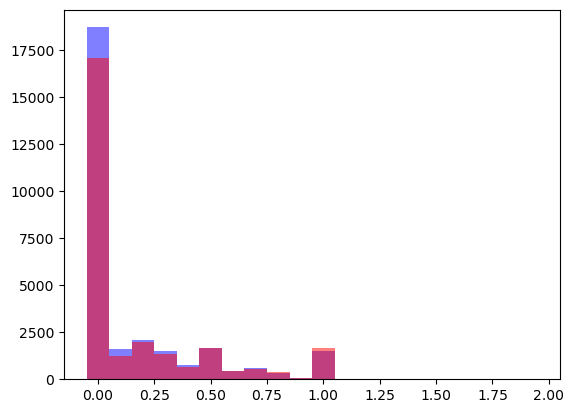

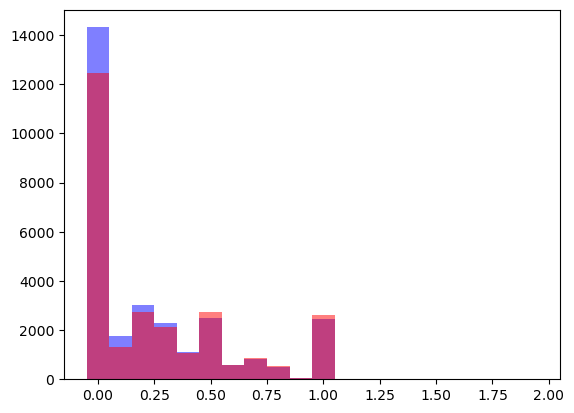

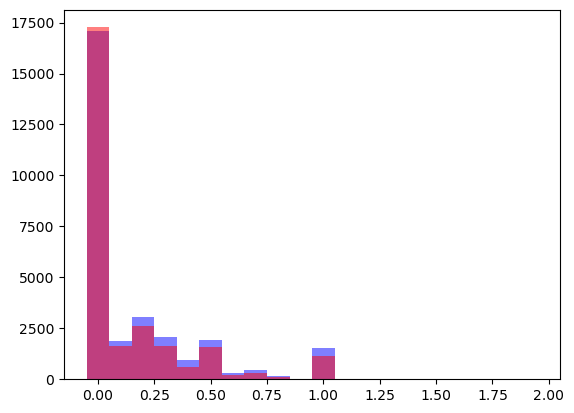

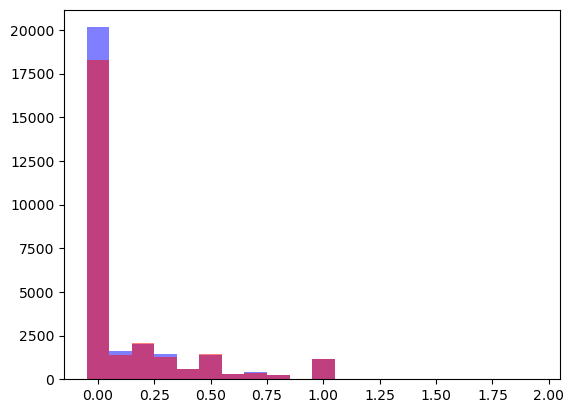

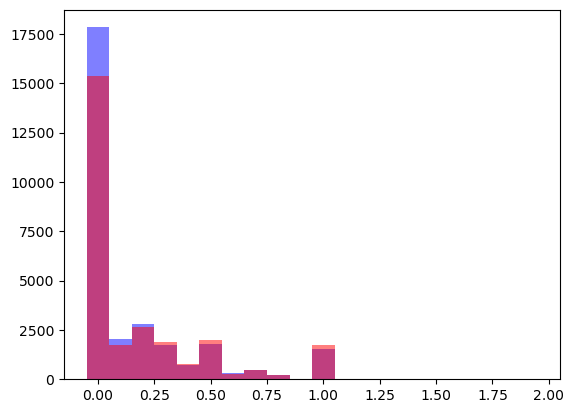

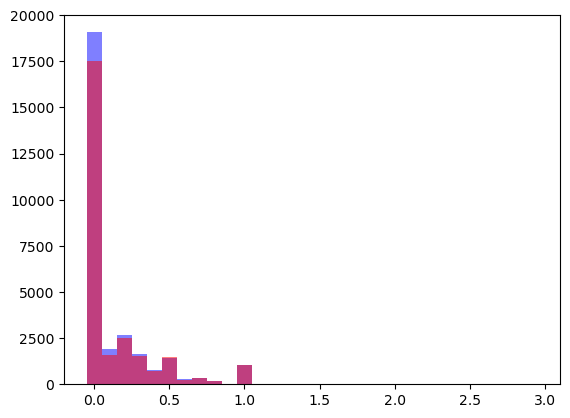

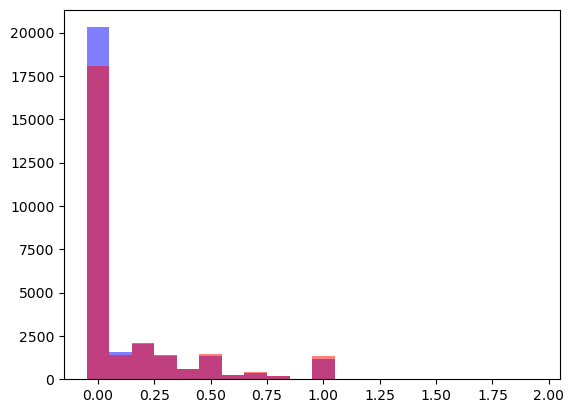

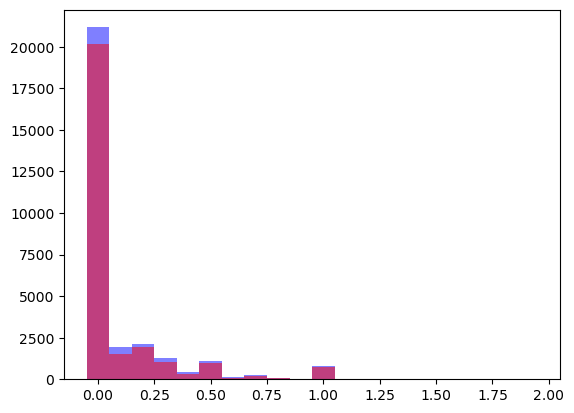

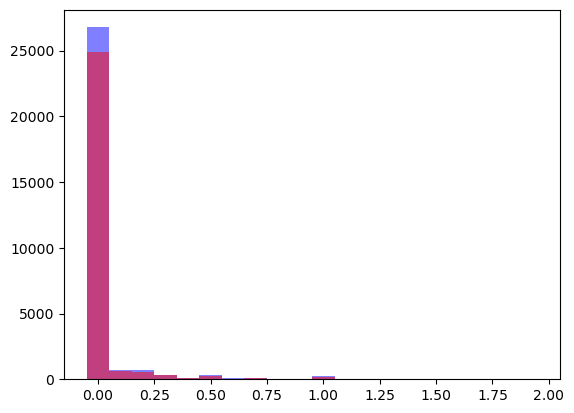

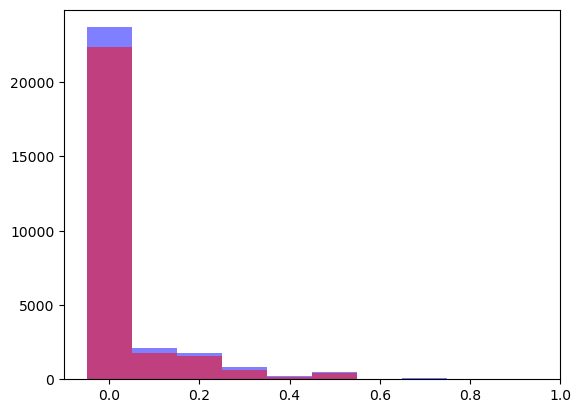

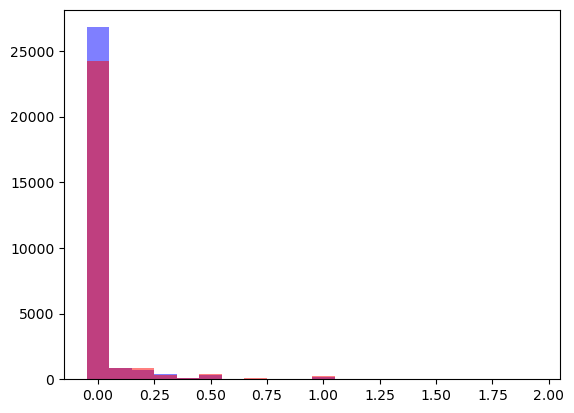

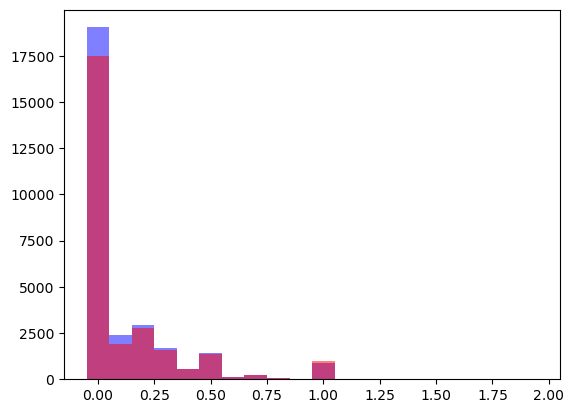

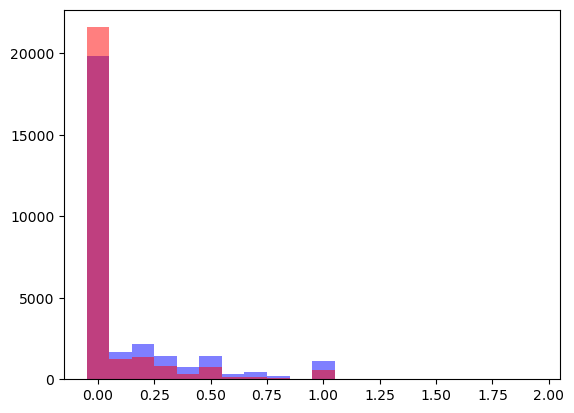

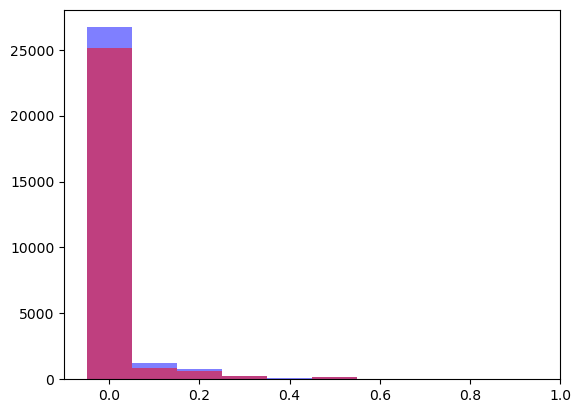

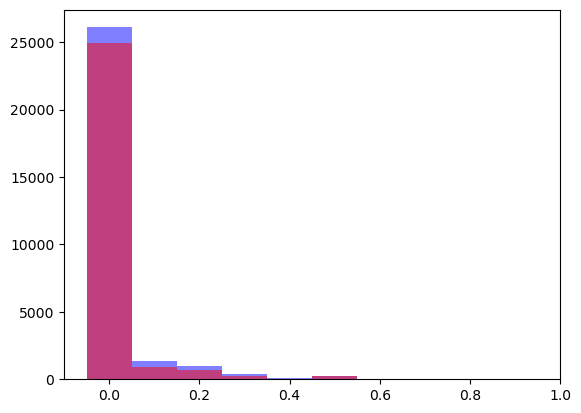

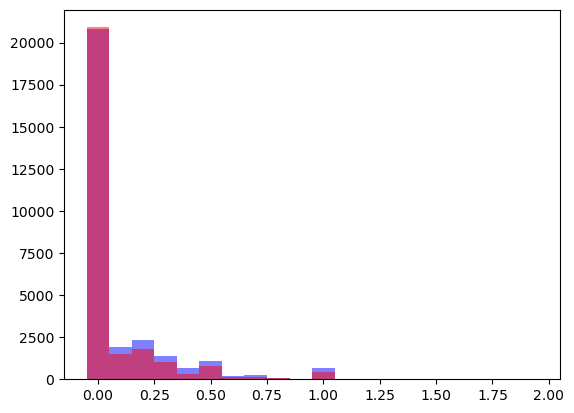

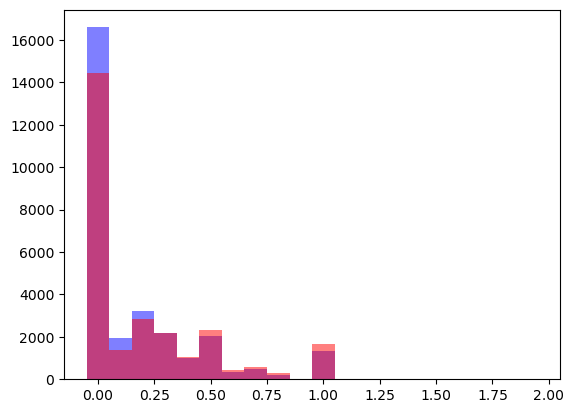

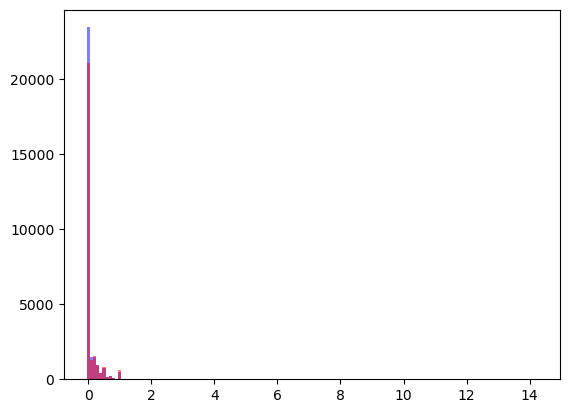

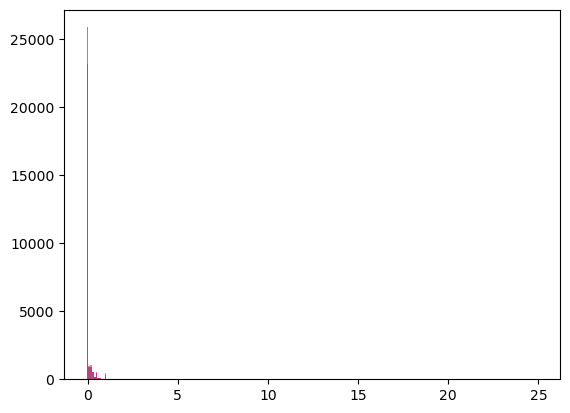

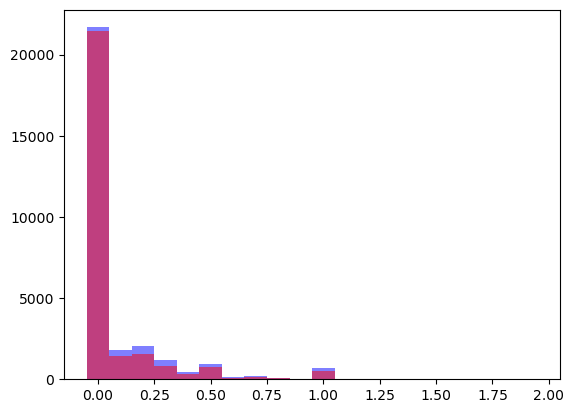

In [ ]:
normalized_tag_columns = [
    'Tough grader (Normalized)', 'Good feedback (Normalized)', 'Respected (Normalized)',
    'Lots to read (Normalized)', 'Participation matters (Normalized)', 
    "Don’t skip class or you will not pass (Normalized)", 'Lots of homework (Normalized)',
    'Inspirational (Normalized)', 'Pop quizzes! (Normalized)', 'Accessible (Normalized)', 
    'So many papers (Normalized)', 'Clear grading (Normalized)', 'Hilarious (Normalized)',
    'Test heavy (Normalized)', 'Graded by few things (Normalized)', 'Amazing lectures (Normalized)',
    'Caring (Normalized)', 'Extra credit (Normalized)', 'Group projects (Normalized)',
    'Lecture heavy (Normalized)'
]

# This result list will be used to generate a dataframe to match tag and p-values
tag_results = []

for tag in normalized_tag_columns:
    # Split normalized tag values by gender
    tag_male = all_data.query("`Male gender` == 1")[tag]
    tag_female = all_data.query("`Female` == 1")[tag]
    bins = np.arange(-0.05, np.maximum(tag_male.max(), tag_female.max()), 0.1)
    plt.hist(tag_male, bins=bins, alpha=0.5, color="blue")
    plt.hist(tag_female, bins=bins, alpha=0.5, color="red")
    plt.show()

In [ ]:
normalized_tag_columns = [
    'Tough grader (Normalized)', 'Good feedback (Normalized)', 'Respected (Normalized)',
    'Lots to read (Normalized)', 'Participation matters (Normalized)', 
    "Don’t skip class or you will not pass (Normalized)", 'Lots of homework (Normalized)',
    'Inspirational (Normalized)', 'Pop quizzes! (Normalized)', 'Accessible (Normalized)', 
    'So many papers (Normalized)', 'Clear grading (Normalized)', 'Hilarious (Normalized)',
    'Test heavy (Normalized)', 'Graded by few things (Normalized)', 'Amazing lectures (Normalized)',
    'Caring (Normalized)', 'Extra credit (Normalized)', 'Group projects (Normalized)',
    'Lecture heavy (Normalized)'
]

# This result list will be used to generate a dataframe to match tag and p-values
tag_results = []

for tag in normalized_tag_columns:
    # Split normalized tag values by gender
    tag_male = all_data.query("`Male gender` == 1")[tag]
    tag_female = all_data.query("`Female` == 1")[tag]
    print(tag)
    print(tag_male.value_counts())
    print(tag_female.value_counts())

Tough grader (Normalized)
0.000000    18561
1.000000     1528
0.500000     1512
0.333333     1062
0.250000      756
0.200000      528
0.666667      478
0.166667      388
0.400000      300
0.142857      299
0.125000      229
0.285714      198
0.111111      191
0.750000      183
0.600000      176
0.428571      136
0.100000      130
0.222222      113
0.090909       98
0.083333       97
0.571429       84
0.076923       82
0.800000       78
0.375000       76
0.300000       73
0.071429       70
0.181818       68
0.714286       53
0.444444       50
0.272727       48
0.363636       47
0.833333       43
0.062500       42
0.555556       42
0.625000       41
0.153846       39
0.454545       37
0.066667       37
0.214286       35
0.055556       31
0.230769       30
0.058824       28
0.133333       28
0.307692       25
0.857143       24
0.545455       23
0.105263       22
0.777778       21
0.461538       20
0.117647       20
0.384615       19
2.000000       19
0.052632       19
0.050000       18
0.